<a href="https://colab.research.google.com/github/Akniko/Task2App/blob/main/AI_endterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Intelligence Final Project

Theme: **AI against COVID-19: COVID detection with audio cough recordings**

Done by MSc Software Engineering 2nd year students: 

Alibek Akniyet

Talapkaliyeva Aiya

Talapova Shyryn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#importing all necessary libraries
import numpy
import seaborn
import matplotlib.pyplot as pyplot
import tensorflow
import librosa
import librosa.display
import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from scipy import signal
from scipy.io import wavfile
from matplotlib.pyplot import specgram
from PIL import Image

In [ ]:
"""
#transforming cough mp3 files into mel spectograms
#in total we got 121 images with negative and positive results

samples, sample_rate = librosa.load('/content/drive/MyDrive/cough_recordings/clinical_segmented_neg_neg-0422-098-cough-f-24-5.mp3')
fig = pyplot.figure(figsize = [4, 4])
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)
S = librosa.feature.melspectrogram(y = samples, sr = sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref = numpy.max))
buf = io.BytesIO()
pyplot.savefig(buf, bbox_inches = 'tight', pad_inches = 0)
buf.seek(0)
im = Image.open(buf)
im.show()
buf.close()

"""

"\n#transforming cough mp3 files into mel spectograms\n#in total we got 121 images with negative and positive results\n\nsamples, sample_rate = librosa.load('/content/drive/MyDrive/Audiodata/clinical_segmented_neg_neg-0422-098-cough-f-24-5.mp3')\nfig = pyplot.figure(figsize = [4, 4])\nax = fig.add_subplot(111)\nax.axes.get_xaxis().set_visible(False)\nax.axes.get_yaxis().set_visible(False)\nax.set_frame_on(False)\nS = librosa.feature.melspectrogram(y = samples, sr = sample_rate)\nlibrosa.display.specshow(librosa.power_to_db(S, ref = numpy.max))\nbuf = io.BytesIO()\npyplot.savefig(buf, bbox_inches = 'tight', pad_inches = 0)\nbuf.seek(0)\nim = Image.open(buf)\nim.show()\nbuf.close()\n\n"

In [ ]:
#connecting google drive to the notebook to upload images of mel spectograms
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#specifying the path to the folder containing our newly made mel specograms of coughs
spectograms = '/content/drive/MyDrive/cough_spectograms'

In [ ]:
#preprocessing image data and dividing it into training (80%) and validation (20%) data
generate_data = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
training_data = generate_data.flow_from_directory(directory = spectograms, target_size = (150, 150), shuffle = True, subset = 'training')
validation_data = generate_data.flow_from_directory(directory = spectograms, target_size = (150, 150), subset = 'validation')

Found 98 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
#building convolutional neural network model with four layers
#we used relu activation function and for the output softmax activation function
convnet_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tensorflow.keras.layers.MaxPooling2D(2, 2),
    tensorflow.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tensorflow.keras.layers.MaxPooling2D(2, 2),
    tensorflow.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tensorflow.keras.layers.MaxPooling2D(2,2),
    tensorflow.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tensorflow.keras.layers.MaxPooling2D(2, 2),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(256, activation = 'relu'),
    tensorflow.keras.layers.Dense(2, activation = 'softmax') 
]) 

In [ ]:
#compiling and fitting our convnet_model with categorical_crossentropy as loss function, and adam as optimizer, setting 100 epochs
convnet_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
convnet_model.fit(training_data, batch_size = 32, epochs = 100)

Epoch 1/100
4/4 [==============================] - 3s 689ms/step - loss: 0.6632 - accuracy: 0.6122
Epoch 2/100
4/4 [==============================] - 2s 694ms/step - loss: 0.5882 - accuracy: 0.6939
Epoch 3/100
4/4 [==============================] - 2s 456ms/step - loss: 0.5881 - accuracy: 0.7857
Epoch 4/100
4/4 [==============================] - 2s 461ms/step - loss: 0.5567 - accuracy: 0.7551
Epoch 5/100
4/4 [==============================] - 2s 686ms/step - loss: 0.5919 - accuracy: 0.7347
Epoch 6/100
4/4 [==============================] - 2s 455ms/step - loss: 0.5794 - accuracy: 0.7347
Epoch 7/100
4/4 [==============================] - 2s 483ms/step - loss: 0.5386 - accuracy: 0.7041
Epoch 8/100
4/4 [==============================] - 2s 459ms/step - loss: 0.5547 - accuracy: 0.7653
Epoch 9/100
4/4 [==============================] - 2s 452ms/step - loss: 0.5666 - accuracy: 0.7755
Epoch 10/100
4/4 [==============================] - 2s 479ms/step - loss: 0.5227 - accuracy: 0.7857
Epoch 11/

1/1 [==============================] - 0s 401ms/step - loss: 0.2940 - accuracy: 0.8696
Test accuracy:  0.8695651888847351
Confusion matrix
[[15  0]
 [ 0  8]]


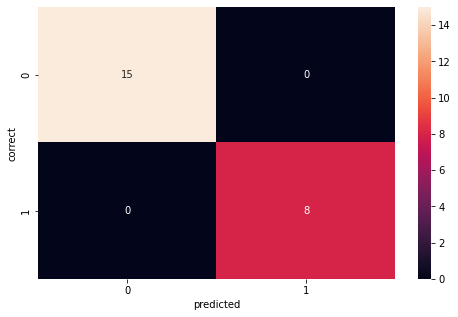

In [ ]:
#evaluating and predicting our data with validation data and illustrating results on the confusion matrix
%matplotlib inline
accuracy = convnet_model.evaluate(validation_data)
print('Test accuracy: ', accuracy[1])
data_prediction = convnet_model.predict(validation_data)
predicted = numpy.argmax(data_prediction, axis = 1)
correct = numpy.argmax(data_prediction, axis = 1)
print('Confusion matrix')
print(confusion_matrix(correct, predicted))
f, ax = pyplot.subplots(figsize = (8,5))
seaborn.heatmap(confusion_matrix(correct, predicted), annot = True, fmt = ".0f", ax = ax)
pyplot.xlabel("predicted")
pyplot.ylabel("correct")
pyplot.show()